#  Basic usage tutorial 

## Installation

Please refer to [installation](https://pyfragdocument.readthedocs.io/en/latest/install.html)   

## Job Prepration

In [1]:
!source $PYFRAGHOME/.pyfragrc

Before this command, the PYFRAGHOME path has to be set correctly!

In [2]:
%mkdir pyfrag

mkdir: pyfrag: File exists


In [3]:
%cp $PYFRAGHOME/example/job.in ./pyfrag

In [4]:
%cd pyfrag

/Users/xiaobo/Dropbox/jupyter-notebook/pyfrag


In [6]:
%ls

Further_reading.ipynb*      pyfrag/
files/                      result/
handson-ml/                 stocks/
interactive_tutorial.ipynb*


**Noted** For each job a new directory and a new job name should be given. Don't put more than one jobs in one directory, othervise may cause clash.

Something like this will shown if previous steps is correct. Now we are ready to start PyFrag.
```bash
Xiaobos-MacBook-Air:pyfrag xiaobo$ ls
job.in
Xiaobos-MacBook-Air:pyfrag xiaobo$ 
```

## Input Explanation

In [6]:
%cat job.in

JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END


ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA



scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END


PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END




Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       

***Explanation of input options!***

```python

''''
JOBSUB section is for the information passed to the remote host machine 
where the heavy computatonal job is done! It is written in the fashion of Slurm.
''''
JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END

''''
Provide the parameters for a DFT calculation using ADF software.
''''
ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA

scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END

''''
Provide the parameters for an activation strain analysis.
''''

PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END


''''
Guessed geometry coordinate for reactent1, reactent2, reactent complex,
transition state and product.
''''

Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       0.322055
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429



TS: Fe-II(CO)4 + CH4
C      -1.74196777      -2.22087997       0.00000000
Pd     -2.13750904      -0.23784341       0.00000000
H      -2.80956968      -2.49954731       0.00000000
H      -1.26528821      -2.62993236       0.8956767
H      -1.26528821      -2.62993236      -0.895676
H      -0.75509932      -0.88569836       0.00000000




P: Fe-II(CO)4 + CH4
C      -2.10134690      -2.41901732       0.1862099
Pd      -2.73145901      -0.57025833       0.419766
H      -3.88639130      -1.04648079      -0.43099501
H      -2.78392696      -3.12497645       0.66994616
H      -1.97386865      -2.66955518      -0.87144525
H      -1.12556673      -2.41201402       0.698583



Geometrycoor END
```

## Job start
PyFrag has several commands, which are explained by running `pyfrag -h` 

In [7]:
!pyfrag -h

Usage: /Users/xiaobo/gitpyfrag/bin/pyfrag [-h] [-s] [-x command]  [...]
 
       -h          : print this information
       -s          : run job quietly
       -x command  : start the executable named command
                   : command include restart, which restart job
                   : end, which terminate job
                   : check, which check the latest jobs information
                   : restart, which restart a job after it is stoped
                   : summary, which summarize all job result after jobs finished
                   : default command is pyfrag itself
The example command is like as follow, in which job.in is job input
/Users/xiaobo/gitpyfrag/bin/pyfrag job.in
or
/Users/xiaobo/gitpyfrag/bin/pyfrag -x restart job.in
or
/Users/xiaobo/gitpyfrag/bin/pyfrag -s -x summary job.in


## Job Running

In [2]:
%cd pyfrag

/Users/xiaobo/Dropbox/jupyter-notebook/pyfrag


In [3]:
!ls 

job.in


**Note** you should in the pyfrag directory before you start the job.

In [5]:
!pyfrag job.in

[cartesius.surfsara.nl] Executing task 'deploy'
[cartesius.surfsara.nl] Executing task 'deploy'
[cartesius.surfsara.nl] run: if [ ! -d /home/x2sun/pyfragtest_2/job ]; then mkdir /home/x2sun/pyfragtest_2/job; fi
[cartesius.surfsara.nl] put: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/job.in -> /home/x2sun/pyfragtest_2/job/job.in
[cartesius.surfsara.nl] run: bash $HOSTPYFRAG/argueparce/argueparce.sh job.in
[cartesius.surfsara.nl] run: source activate qmworks
[cartesius.surfsara.nl] out: discarding /home/x2sun/miniconda3/bin from PATH
[cartesius.surfsara.nl] out: prepending /home/x2sun/miniconda3/envs/qmworks/bin to PATH
[cartesius.surfsara.nl] out: 

[cartesius.surfsara.nl] run: sbatch sub > jobinfo.txt

Done.
Disconnecting from cartesius.surfsara.nl... done.
[cartesius.surfsara.nl] run: bash $HOSTPYFRAG/result/result.sh
[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/jobstate.txt <- /home/x2sun/pyfragtest_2/job/result/jobstate.txt


[cartesius.su

**If you don't set -s flag, above information will be printed. After a while (depanding on the time interval in the `RESULTCHECK`  configuration), a webpage will jump up with the latest information of your job running.**

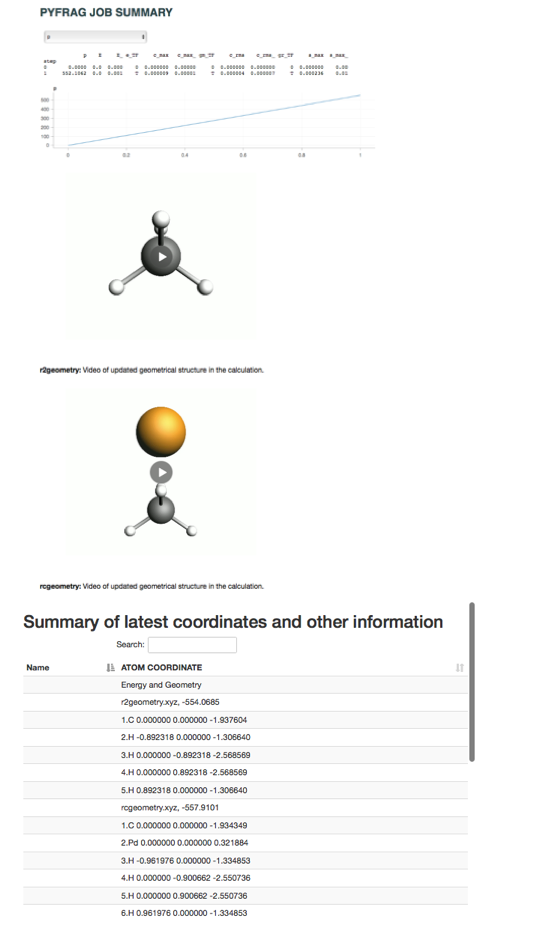

In [8]:
from IPython.display import Image
Image(filename="../files/jobinfo.png")

## Job Variation

If you find the trend (as shown by the converge standerd and video) is wrong, you just need change the input file, like change functional from OPBE to BLYP:

```python
xc
# gga OPBE
gga BLYP
end
```

After it is saved, the program will find the difference and pop up window ask you if you want to resubmit you new job

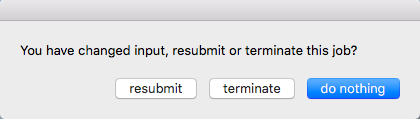

In [10]:
from IPython.display import Image
Image(filename="../files/button.png")

If you select resubmit, old job will be stop and new job will started automatically!

## Job End

Job can also be stoped by hand, as expained before.

```bash
Xiaobos-MacBook-Air:pyfrag xiaobo$  pyfrag -x end job.in
```

## Job Restart
If your job is stoped, you can also restart it.

```bash
Xiaobos-MacBook-Air:pyfrag xiaobo$ pyfrag -x restart job.in 
```

## Job Check
If you don't want to receive the updated information, you can just shut down the terminal by `control + w` or `control + d`. After a period of time, you can check the latest news by:

```bash
Xiaobos-MacBook-Air:pyfrag $  pyfrag -x check job.in
```

## Job Result

Once job is finished, you can check the job result by running`pyfrag -x summary job` in job directory
or `!bokeh serve --show stocks` in result directory where stocks is located. A website will pop up which 
summarize all data in a vivid way.

In [8]:
!bokeh serve --show ../stocks

2019-02-09 13:24:33,999 Starting Bokeh server version 0.13.0 (running on Tornado 5.1)
2019-02-09 13:24:34,004 Bokeh app running at: http://localhost:5006/stocks
2019-02-09 13:24:34,005 Starting Bokeh server with process id: 34133
        E     E_     c_max    ...     t1_s_rms  t1_s_rms_  t1_sr_TF
step                          ...                                  
0     0.0  0.000  0.000000    ...     0.000000   0.000000         0
1     0.0  0.001  0.000016    ...     0.000178   0.006667         T
2     0.0  0.001  0.000009    ...     0.000089   0.006667         T

[3 rows x 32 columns] p
2019-02-09 13:24:34,917 200 GET /stocks (::1) 352.69ms
2019-02-09 13:24:35,918 101 GET /stocks/ws?bokeh-protocol-version=1.0&bokeh-session-id=XzT3Td1Rl4a76AfZhbxD8QSxJvDGI8IBLLf0rnE7gblm (::1) 1.37ms
2019-02-09 13:24:35,919 WebSocket connection opened
2019-02-09 13:24:35,919 ServerConnection created
2019-02-09 13:24:36,992 WebSocket connection closed: code=None, reason=None
Received signal 15, shutting

**Note that sometimes you need to use this command:**
```bash
kill $(ps aux | grep '[b]okeh' | awk '{print $2}') 2>/dev/null
```
**to stop bokeh server running!**

In [6]:
%ls

job.in  result/


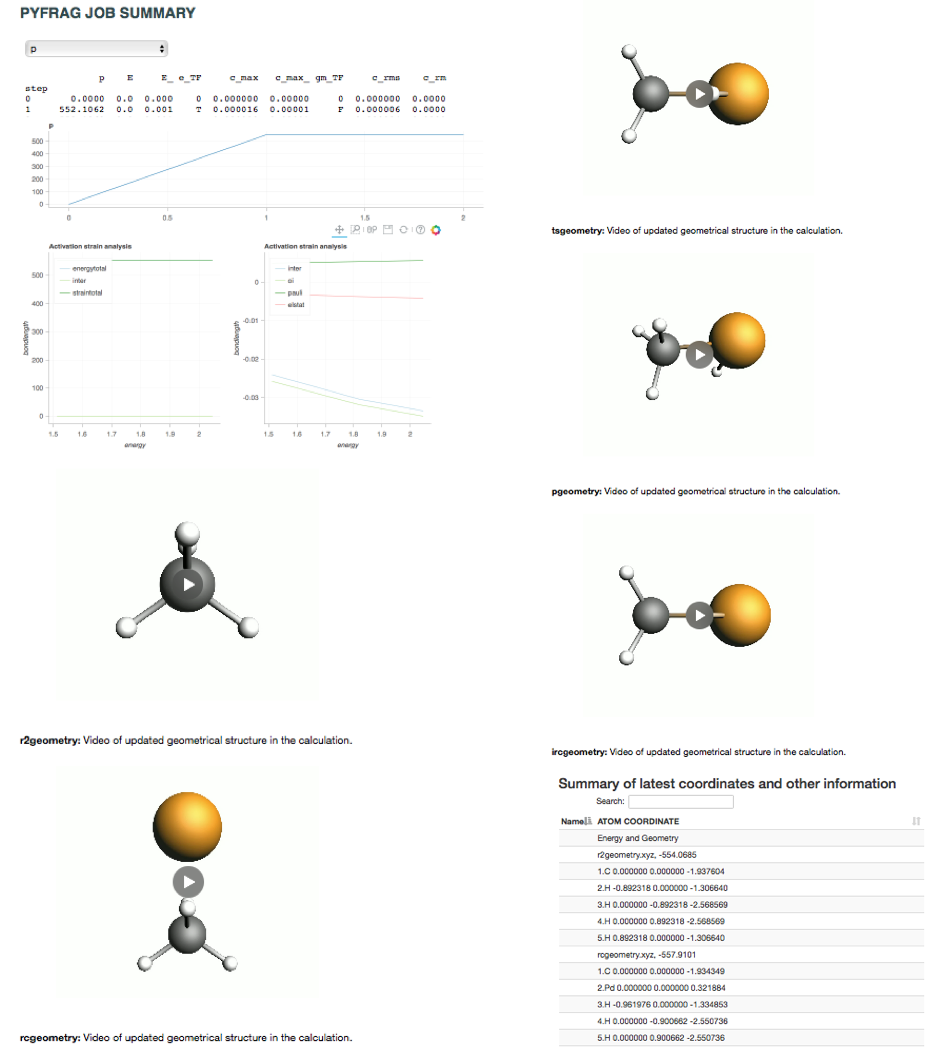

In [5]:
from IPython.display import Image
Image(filename="files/jobresult.png")

## Multiple Jobs

Other jobs can also be run in the meantime in another teminal. It should be noted different jobs shoud be given different job names in a different job directory to keep everthing clean and avoid clash.

***For further explation of job result, please read the following chapter–[Further Reading](https://pyfragdocument.readthedocs.io/en/latest/Further_reading.html).***